In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import wtools

# Import GSLib/SGeMS

Here we can import any GSLib or SGeMS file as a pandas data frame. Note that if you'd like to restructure this data into a 3D grid that SGeMS uses Fortran ordering and you will have to perfrom a reshape using the grid exentents. Luckily, if you know your grid's extents you could pass the table to `tableToGrid()` with your extents to make an XYZ grid!

In [3]:
wl = wtools.readGSLib('data/a_wlrefcleaned.sgems')
print(wl.header)
wl.head()

Walker Lake (260x300x1)


,Utrans
0,0.526667
1,0.526667
2,0.526667
3,0.526667
4,0.526667


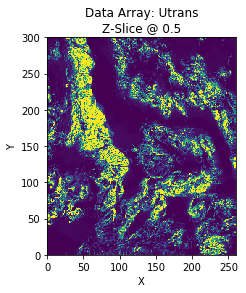

In [4]:
wlg = wtools.Grid.tableToGrid(wl, (260, 300, 1))
wlg.display(plt, 'Utrans', vmin=0, vmax=1000)

# Saving Out

**DataFrame:** If you have a Pandas DataFrame (a table) then go ahead and call `wtools.saveGSLib()` to save your data in the GSLib format. If no header is given, then this function will automatically write the current date as the header.

**Grid:** for grids, you have two options. You can save in the UBC mesh/model format ot your could save in the SGeMS grid format. Be warned that saveing in the SGeMS format causes a loss of metadata and it treats your grid as a uniform mesh.


In [5]:
wtools.saveGSLib('output/wl_out.gslib', wl)
wlg.saveUBC('output/walker')
wlg.saveSGeMS('output/wlgrid-out.sgems')

1

## Load SGeMS Grids

If your data file already has the grid extents in the header line of your file as 3 seperated integers, then you can use `readSGeMSGrid()` to directly load up an XYZ grid of your data. Note that you can specify spacings for each axial direction.

In [6]:
top = wtools.Grid.readSGeMSGrid('data/topexample.sgems', spacing=(5, 5, 10))
top

<Grid instance at 4392033248>
  Shape: (150, 200, 20)
  Origin: (0.0, 0.0, 0.0)
  X Bounds: (0.0, 750.0)
  Y Bounds: (0.0, 1000.0)
  Z Bounds: (0.0, 200.0)
  Models: (3)
    'av' (float64): (1.906e-01, 9.092e-01)
    'r' (float64): (-7.526e-01, 7.158e-01)
    'z' (float64): (-5.753e-02, 1.157e+00)

Want to change the origin of that grid? Easy! Just edit that attribute of the grid:

In [7]:
top.origin = (100.0, 500.0, 300)
top

<Grid instance at 4392033248>
  Shape: (150, 200, 20)
  Origin: (100.0, 500.0, 300.0)
  X Bounds: (100.0, 850.0)
  Y Bounds: (500.0, 1500.0)
  Z Bounds: (300.0, 500.0)
  Models: (3)
    'av' (float64): (1.906e-01, 9.092e-01)
    'r' (float64): (-7.526e-01, 7.158e-01)
    'z' (float64): (-5.753e-02, 1.157e+00)

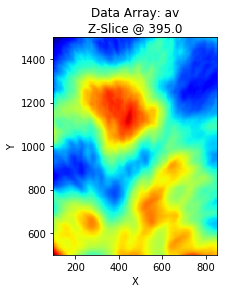

In [8]:
top.display(plt, 'av', plane='xy', cmap='jet')

# Testing the File I/O

Here, we save out and reload the topexample grid to make sure everything works

In [9]:
top.saveUBC('output/topexample')
load = wtools.Grid.readUBC('output/topexample')
top.equal(load)

True

In [10]:
top.saveSGeMS('output/top-out.sgems')
load = wtools.Grid.readSGeMSGrid('output/top-out.sgems', spacing=(5, 5, 10), origin=(100.0, 500.0, 300))
top.equal(load)

True